## HarperNet: How a Computer Sees / Developing your own Dataset

**Actions/Work flow**
* Write out aims for section - done
* Begin how computer sees - done
* Understand PIL (Image) and imshow - done (imshow only)
* Matplotlib image tutorial - done
* Pillow review - done
* Use knowledge to display images in Display images section. - done
* Work on displaying images. Why plt.figure? how to get inline/subplots. Try and add a title for each image based on the filename. - done
*Tuesday 24 April*
* Apply code to show numpy array as an image -
* TIdy up work to date, identify next steps. 
* Notes on libraries used - PIL and imshow
* notes on how a computer sees. loading our dataset.
* Identify image preprocessing topics
* Research how to load and split test and training data - use notebook

Other things to do:
* How will we train and validate the model? what are our options?

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Introduction

* This notebook is the first step in my computer vision project. I will try to understand:
    * How Computers See, through theory and demonstration, and what this means for my project 
    * How to develop my own dataset, specifically what makes a good image dataset and what lessons can be applied to business/other projects/self-driving cars?
    * How to process the dataset to get it ready for the deep learning models to come 

### How does a computer see?

**To include**
* *Simply, there are conventions about how image data is represented on a computer. Different file formats use the information slightly differently, but we have access to common raw input data to process. [**is this right?**]*
* Demonstrate: How the computer sees the image; use of imshow and numpy variations to show images (cifar_10). se map-mist for code to take a closer look at image?
* What is the link between the image and the np.array? Does the image translate as an array normally? What treatment is required 
* Understand what the array is, what the size and shape of it is when it is passed to the model  (review python shapes - again!! See my written notebook)
* *It is not that computers see; it is about how they represent images from the raw inputs. What it takes as input data and how it converts them to images. Really we only need this input data. The conversion is less important, though we can assume there is an input standard.*

**Notes** *Go over to get better and say this more simply*
* Before understanding how computers 'see', understand how they represent and process images. Images are composed of pixels (*is this right? I haven't read that* - in this instance a pixel is just a bit of information), each one a colour represented by values. The value converts to a colour.
* This process repeated enough times will generate a picture. With 8 bit imagery, we can generate 256 colour choices per pixel/bucket of information (2^8). With 3 channels of RGB, this amounts to 16 million colour choices per pixel. Each pixel has 3 channels, one based in red, one green, one blue, to combine in to the right colour. 3 x 8 bit is 24 bits. 
* It then follows that we need to provide plt.imshow with 8bit info. Only PNG can handle something differently. Matplotlib can take float32, which is good if we scale the data. This is to actually show the image. 
* See https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

* Computers 'see' by 

**Everything is a number**
* That means two things: data that represents images is pass in to a computer as a digital representation of an analogue signal, using an A/D decoder contained within an camera. This data is passed as numbers in binary 'notation.'
* Programming languages that we use for deep learning, and other things, convert the binary to hexidecimal so that images are represented as numbers that we understand.

**Image capture**
* 
* 

**Arrays**
* How are images represented as numbers? Simply, a number represents a colour in a portion of an image. An array of numbers therefore represents a number of portions of the images. 
* In more detail, 8 bits can represent up to 256 numbers, and therefore 256 colours. An image will be broken down into pixels (picture elements). A number from 0 - 255 is present at each pixel location, which is represented in part of the array. The full array represents the full picture.
* *The number of rows and columns is determned by the resolution of the screen, higher resolution is higher pixels, is greater quality but is more memory.* Similarly, a picture with more pixels is of greater quality, and we can see that on blocky pictures. The values representing the pixels are ordered according to the specification of the programme. The python, numpy way of doing this is explored later.



**Questions**
* *So why do we convert images to numbers?*: We don't. Images *have* to be represented as numbers to be processed by a computer.
* *Why 256 colours?*: This is driven by the number of bits. A bit is a binary digit that can be either I/O. 8 bits provides 256 combinations of I/O [or 1,0] (2^8). *I assume where images can be processed **and/or** captured in more than 8 bits. My guess is that images can be captured in higher bits and are processed depending on the software and capability of the computer*  
* *Why 8 bits?*: this seems to be the unofficial standard. However, 3 channels of 8 bits is 24 bits and that can represent over 16 million colours, more than the human eye can see.

#### Displaying/Deconstructing an image in Python

    # understand the differences between opening and showing an image, (Pil vs Image)
    # noting that img.show() opens the image in a separate window

JPEG (4032, 3024) RGB


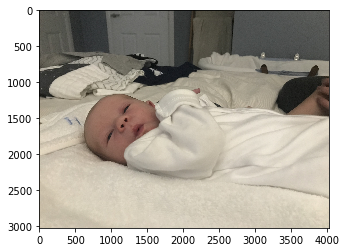

In [4]:
# this piece of code opens an Image and then shows it 
# Image.open loads an image from a file and returns an Image object [that we can perform tasks on via that class]
img = Image.open('/Users/drh/Documents/HarperNet/HarperImages/4.Nothing/IMG_0839.jpg')
plt.imshow(img)

# we can get more details of the image here
print(img.format, img.size, img.mode)

In [5]:
# we can convert the image to an array
# we need to load the file first before converting to an array
img_shape = np.asarray(img)

# and the actual array
img_shape

array([[[ 89,  90,  82],
        [ 90,  91,  83],
        [ 92,  93,  85],
        ..., 
        [104, 106, 103],
        [104, 106, 103],
        [102, 104, 101]],

       [[ 90,  91,  83],
        [ 89,  90,  82],
        [ 90,  91,  83],
        ..., 
        [ 97,  99,  96],
        [ 97,  99,  96],
        [ 96,  98,  95]],

       [[ 90,  91,  83],
        [ 88,  89,  81],
        [ 87,  88,  80],
        ..., 
        [ 90,  92,  89],
        [ 89,  91,  88],
        [ 89,  91,  88]],

       ..., 
       [[203, 192, 174],
        [204, 193, 175],
        [205, 194, 176],
        ..., 
        [219, 212, 193],
        [217, 210, 191],
        [216, 209, 190]],

       [[205, 194, 176],
        [206, 195, 177],
        [207, 196, 178],
        ..., 
        [218, 211, 192],
        [217, 210, 191],
        [217, 210, 191]],

       [[206, 198, 179],
        [207, 199, 180],
        [208, 200, 181],
        ..., 
        [217, 210, 191],
        [217, 210, 191],
        [218, 211,

In [1]:
# display this array as it would like within an image

def visualize_input(img, ax):
    img = img[:, :, 1]                              # turn image array into 2D array
    ax.imshow(img, cmap='gray')
    width, height = img.shape                       # stores the two values returned by .shape as variables
    thresh = img.max()/2.5                         
    for x in list(range(width)):                    # goes through all the values in width
        for y in list(range(height)):               # goes through all the values in height
            ax.annotate(str(img[x][y]), xy=(x,y),   # we annote with the value at image [x][y] of image, at coord(x,y)  
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black') # refers to text, not background

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

NameError: name 'plt' is not defined

In [ ]:
visualize_input(img_shape, ax)

***Explain the code***

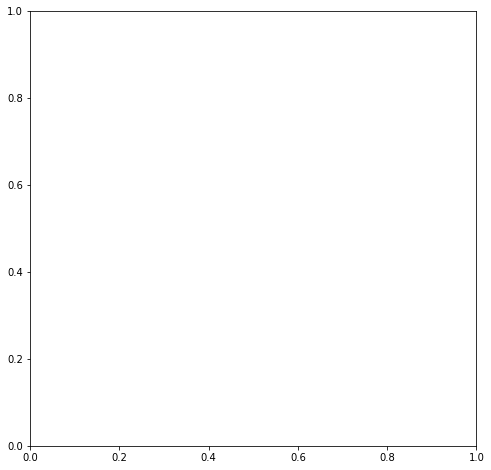

In [9]:
# here we draw our figure
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(111)

In [7]:
# here we reshape the array to a 2D array
img = img_shape[:, :, 1]
img    

array([[ 90,  91,  93, ..., 106, 106, 104],
       [ 91,  90,  91, ...,  99,  99,  98],
       [ 91,  89,  88, ...,  92,  91,  91],
       ..., 
       [192, 193, 194, ..., 212, 210, 209],
       [194, 195, 196, ..., 211, 210, 210],
       [198, 199, 200, ..., 210, 210, 211]], dtype=uint8)

In [ ]:
# here I am not too sure if we return the container info because this is ax. not plt. 
ax.imshow(img, cmap='gray')

In [32]:
# here we can see the assignment of variables based on wha img.shape returns
width, height = img.shape
print (width, height)

3024 4032


In [36]:
# code updated for python 3. 
# a simple reconstruction of the x,y pairs that show the coordinates of the annotation

for x in list(range(5)):
    for y in list(range(7)):
        xy=(x,y)
        print(xy)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)


In [35]:
# demonstration of the value that will be displayed by pulling the value at that location
img[6][0]

90

(3024, 4032, 3)

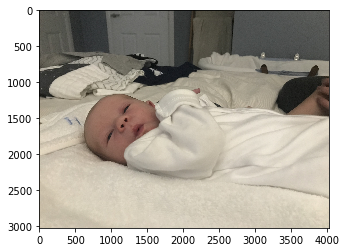

In [8]:
# this also shows the image, but processed using a numpy array as input.
plt.imshow(img_shape)
# we can see more info about the array here
img_shape.shape

**Different shapes**
* Image: JPEG (4032, 3024) RGB
* Array: (3024, 4032, 3)
* What does this tell us about the way the images are processed by the software? Does RGB mean that the JPEG software is looking for 3 channels, or is it something else?

**What can we say about the array?**
* What is its dtype? What does that mean? Is this the only dtype acceptable for images?
    * uint8	Unsigned integer (0 to 255) 
* What can we conclude each value of the array means in terms of colour?  

**Lessons**
* We cannot convert the filepath directly to an array
* We need to open it as an image first using PIL.image. Is this the only way of doing it?


**Notes**
* Need to explore Image/PIL and imshow. But are two different linraries and both may not be needed in conjunction with each other.
* So the code below could be used with adding image.open to it
* and the code using npasarray made not require imshow.

In [37]:
# lets try and open an image and not plt.imshow but put straight to array
image_new = Image.open('/Users/drh/Documents/HarperNet/HarperImages/2.Feed/IMG_1083.jpg')
image_array = np.asarray(image_new)
image_array

array([[[245, 230, 173],
        [245, 230, 173],
        [245, 228, 172],
        ..., 
        [198, 160, 124],
        [194, 156, 120],
        [189, 151, 115]],

       [[244, 229, 172],
        [244, 229, 172],
        [245, 228, 172],
        ..., 
        [197, 159, 123],
        [194, 156, 120],
        [189, 151, 115]],

       [[243, 228, 171],
        [243, 228, 171],
        [245, 228, 172],
        ..., 
        [196, 158, 122],
        [194, 156, 120],
        [190, 152, 116]],

       ..., 
       [[118, 128, 120],
        [117, 127, 119],
        [118, 128, 120],
        ..., 
        [168, 160, 147],
        [167, 159, 146],
        [165, 157, 144]],

       [[115, 125, 117],
        [115, 125, 117],
        [116, 126, 118],
        ..., 
        [167, 159, 148],
        [165, 157, 146],
        [162, 154, 143]],

       [[110, 120, 112],
        [111, 121, 113],
        [112, 122, 114],
        ..., 
        [166, 157, 148],
        [163, 154, 145],
        [160, 151,

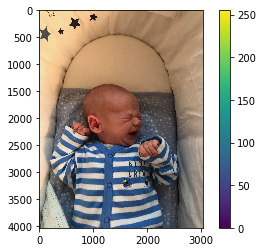

In [67]:
# imshow can take either the 'open' picture or the array
plt.imshow(image_new)
plt.colorbar()

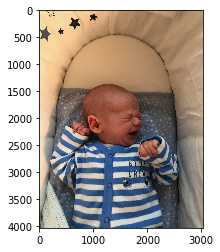

In [40]:
# take array
plt.imshow(image_array)

**Maninpulating the image**

In [63]:
lum_img = image_array[:, :, 2]

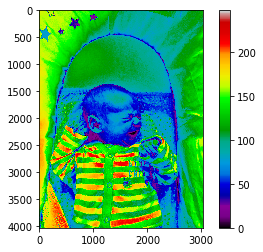

In [69]:
plt.imshow(lum_img, cmap='nipy_spectral')
plt.colorbar()

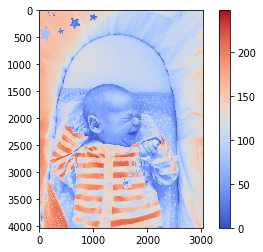

In [68]:
plt.imshow(lum_img, cmap='coolwarm')
plt.colorbar()

**Understanding the libraries we have used**
* *np.asarray*: converts the input to an array. Does not pass subclasses of ndarrays through if these are used for input. Subclasses provide additional structure to inform the array how to operate.
* *plt.imshow* and related *im...*: Note that matplotlib uses Pillow if and when plt fails. plt can only support png files. Image.Open seems to perform the same function as the plt.imread - Read an image from a file into an array. *Is this right?* In addition to imshow, plt. provides other functionality. 
* *PIL.Image* and related PIL: 

### Developing your own dataset

#### Considerations
* How much data do we need? Important question for developing datasets in industry
* Of what quality?
* Of what variation? We will augment the data later.
* How should it be organised?

#### Let's visualise the dataset [user cifar_10]

AttributeError: 'list' object has no attribute 'read'

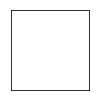

In [74]:
# note that this generates a file path, or a list of filenames and does not generate the arrays behind the filenames

filepath = '/Users/drh/Documents/HarperNet/HarperImages/2.Feed'
filenames = os.listdir(filepath)

# this will need either:
    # imshow with each image converted to an array first - doesn't seem likely
    # imshow after Image.open is used
# will need to split the data first ? in to test, train 


fig = plt.figure(figsize=(20,5))
for i in range(5):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    images = Image.open(filenames)
    ax.imshow(np.squeeze(images[i]))

# lets take a look at one of the images

#img = Image.open('/Users/drh/Documents/HarperNet/HarperImages/5.Test/Test_4.jpg')
#plt.imshow(img)

In [91]:
filepath = '/Users/drh/Documents/HarperNet/HarperImages/2.Feed'
filenames = os.listdir(filepath)
filenames [0:6]

['IMG_1083.jpg',
 'IMG_1068.jpg',
 'IMG_1069.jpg',
 'IMG_1082.jpg',
 'IMG_1080.jpg',
 'IMG_1081.jpg']

In [ ]:
Image.open(os.path.join(filepath,file))

In [ ]:
# this doesn't work!

fig = plt.figure(figsize=(20,5))
for file in filenames[0:2]:
    ax1 = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    immy = os.path.join(filepath, file)
    immy = Image.open(immy)
    ax1.imshow(immy)
#ax.imshow(np.squeeze(images[i]))

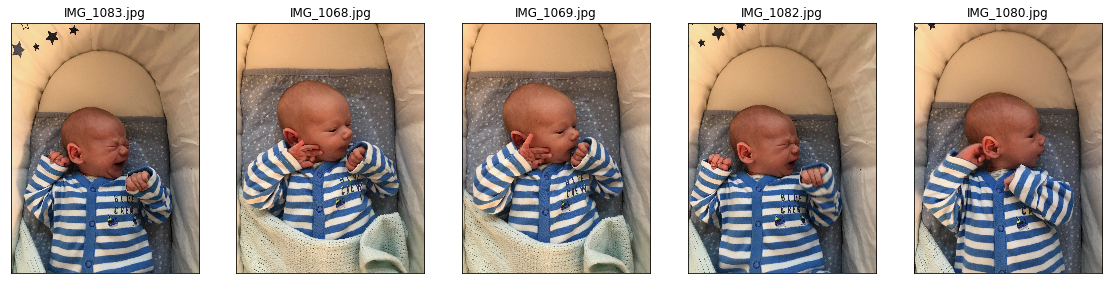

In [187]:
#fig = plt.figure(figsize=(20,5))
# why and how does subplot work? do we need ax? what is the i+1 parameter?

# this works but does not subplot

#for i in range(5):
i = 0
fig = plt.figure(figsize=(60,12))
for file in filenames[0:5]: 
    #i = 0
    immy = os.path.join(filepath, file)
    immy = Image.open(immy)
    # print (immy)
    #fig = plt.figure()
    #plt.title(file)
    #fig.add_subplot(1, 1, 1, xticks=[], yticks=[]) 
    ax = fig.add_subplot(2, 15, i + 1, xticks=[], yticks=[])
    plt.title(file)
    ax.imshow(immy)    
    i += 1
    #print (i)

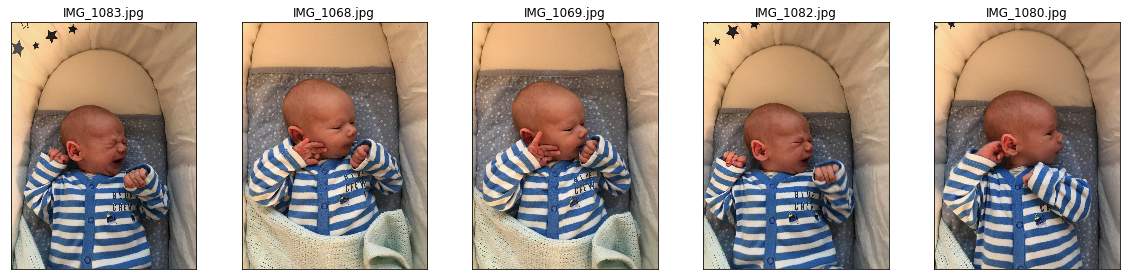

In [194]:
# visualise the dataset - this code works too!


columns = 5
plt.figure(figsize=(20,10))
for i,file in enumerate(filenames[0:5]): 
    #i = 0
    immy = os.path.join(filepath, file)
    immy = Image.open(immy)
    # print (immy)
    #fig = plt.figure()
    #plt.title(file)
    #fig.add_subplot(1, 1, 1, xticks=[], yticks=[]) 
    plt.subplot(len(filenames[0:5]) / columns + 1, columns, i + 1, xticks=[], yticks=[])
    plt.title(file)
    plt.imshow(immy)    
    #i += 1
    #print (i)

In [ ]:
for i,file in enumerate(filenames[0:5]):
    img = os.path.join(filepath, file)
    img = Image.open(img)
    array_img = np.asarray(img)
    print(array_img[i])

In [163]:
print(array_img
     )

IMG_1065.jpg


In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(5):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    immy = os.path.join(filepath, file)
    immy = Image.open(immy)
    immy = np.asarray(immy)
    ax.imshow(np.squeeze(immy[i]))

In [ ]:
o

TypeError: 'JpegImageFile' object does not support indexing

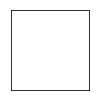

In [96]:
fig = plt.figure(figsize=(20,5))
for i in range(5):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    immy = os.path.join(filepath, file)
    immy = Image.open(immy)
    ax.imshow(np.squeeze(immy[i]))

### Processing the dataset 

**Topics covered**
* What do we need to pass the data to keras/deep learning models
* How should it be processed?
* Do we need to cover to black and white? Rescaled
* How should it be labelled?  
    * One-hot encode the label data; rescale the data - understand how and why [show array before and after]
    * Look at adding labels: can we use folder and filenames?

#### Labelling the data


In [ ]:
# this code 'works' but is recursive and seems to delete the files.
# is labelling the images required? 

# renames the photos so that they are labels
# do this separately so that the images aren't recursively deleted!

#filepath = '/Users/drh/Documents/HarperNet/HarperImages/5.Test'
#filenames = os.listdir(filepath)
#for i in range(len(filenames)):
#    os.rename(                                                  # Rename the file or directory src to dst.
#              os.path.join(filepath, filenames[i]),             # os.path is a module with functions to manipulate pathnames
#              os.path.join(filepath, "Test_"+str(i)+".jpg")     # .join Join one or more path components intelligently.  
#             )                                                  # we need to specify the path, hence need for join

# filenames


In [ ]:
img = Image.open('/Users/drh/Documents/HarperNet/HarperImages/4.Nothing/IMG_0839.jpg')
plt.imshow(img)

#### Understand shape of the array and how it is represented here